## Assignment 3

Data Visualization
Patrick Bernhard

Tasks: make a histogram, density graph, grouped version of each (e.g, using fill), boxplot, violin plot

In [15]:
# Load in data and install necessary packages:
library("ggplot2")

# The data I am using for this assignment is the National Material Capabilites dataset hosted by the Correlates of War (cow)
original.df <- read.csv("NMC-60-wsupplementary.csv")

subset_data <- original.df[original.df$year >= 1966 & original.df$year <= 2016, ]

yearly_data <- aggregate(milex ~ year, data = subset_data, FUN = function(x) sum(x > mean(x)))
names(yearly_data)[2] <- "count_over_avg"


Histogram where each bar represents a year between 1966 and 2016, and the height of the bar shows the number of countries with military expenditure values over that year's average.

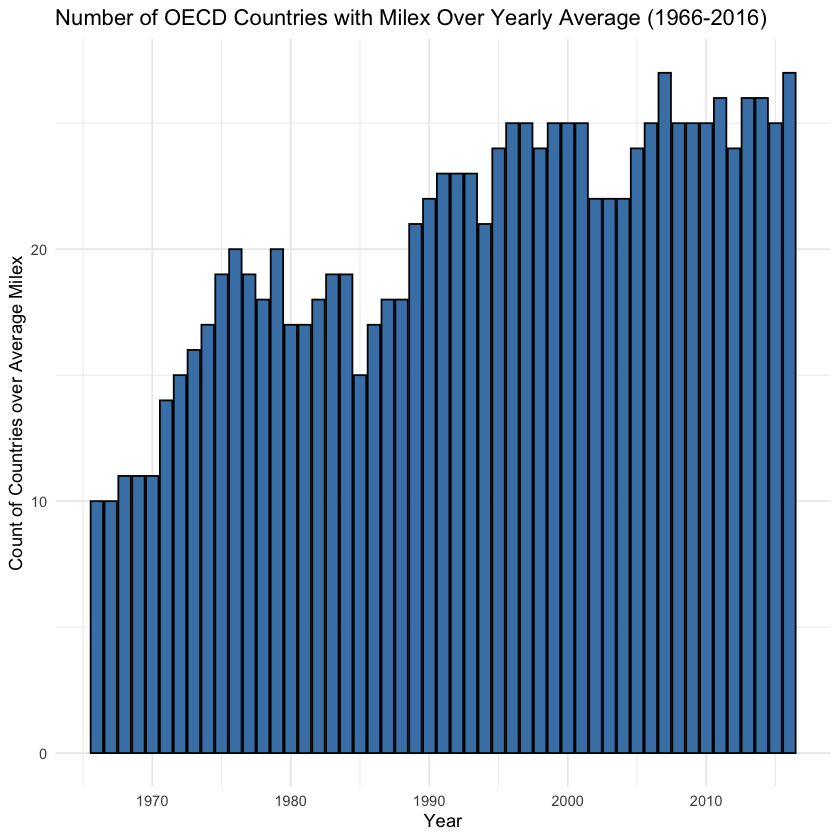

In [16]:
library(ggplot2)

p <- ggplot(yearly_data, aes(x = year, y = count_over_avg)) +
  geom_col(fill = "steelblue", color = "black") +
  labs(title = "Number of Countries with Milex Over Yearly Average (1966-2016)",
       x = "Year",
       y = "Count of Countries over Average Milex") +
  theme_minimal()
print(p)

Density Plot

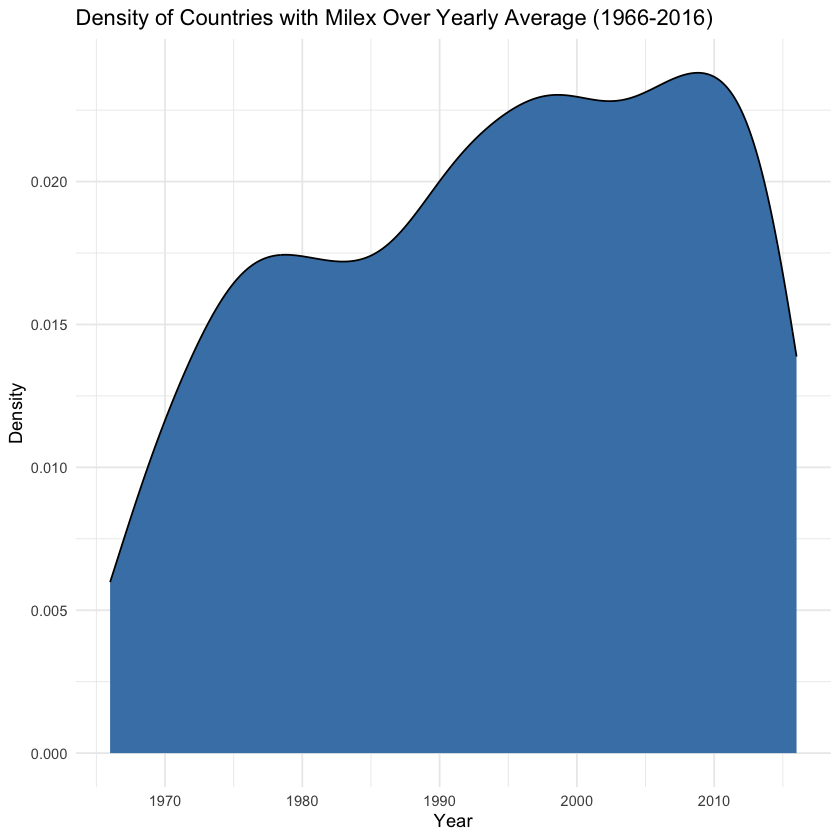

In [22]:
# We already have the subset_data from the previous steps
over_avg_data <- subset_data[subset_data$milex > ave(subset_data$milex, subset_data$year, FUN = function(x) mean(x)), ]


p_density <- ggplot(over_avg_data, aes(x = year)) +
  geom_density(fill = "steelblue") +
  labs(title = "Density of Countries with Milex Over Yearly Average (1966-2016)",
       x = "Year",
       y = "Density") +
  theme_minimal()

print(p_density)

Next, let's create a grouped density plot demonstrating the average military expenditure by each decade in our dataset. We'll log transform this data to mitigate outlier influence and help spread out the data. We use a ridgeline plot to do this. Note the interesting shift from a bimodal to unimodal distribution!

Warning message in log1p(decade_avg$milex):
“NaNs produced”
Picking joint bandwidth of 0.929

Warning message:
“Removed 47 rows containing non-finite values (`stat_density_ridges()`).”


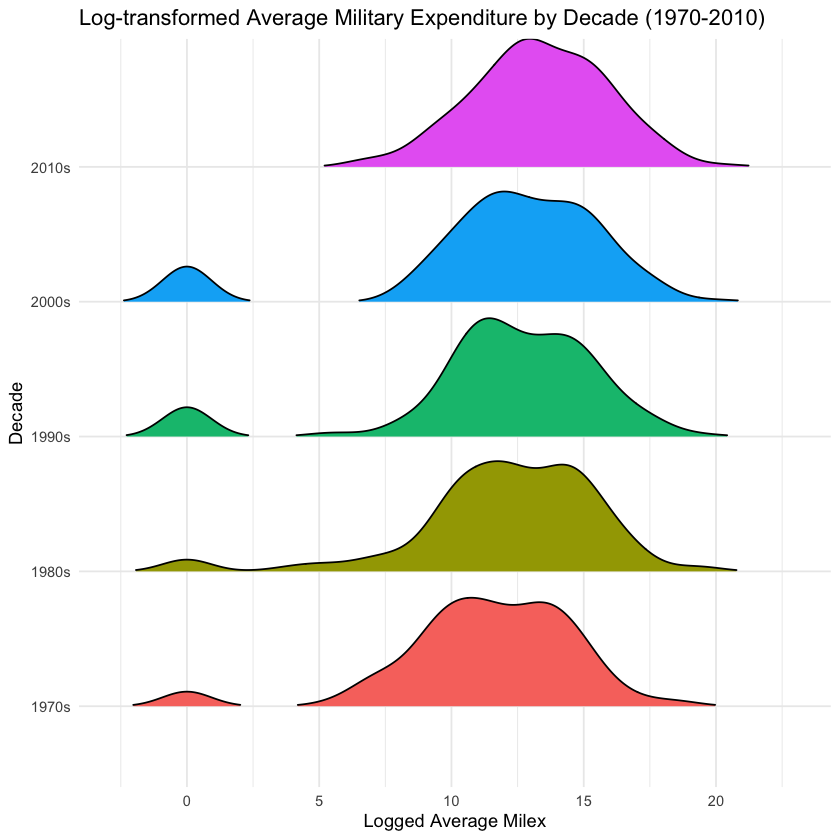

In [35]:
original.df$decade <- cut(original.df$year, breaks = c(1970, 1980, 1990, 2000, 2010, 2020), labels = c("1970s", "1980s", "1990s", "2000s", "2010s"), include.lowest = TRUE, right = FALSE)

decade_avg <- aggregate(milex ~ ccode + decade, data = original.df, FUN = mean)

decade_avg$log_milex <- log1p(decade_avg$milex)  # Using log1p to handle zero values


library(ggplot2)
library(ggridges)

p_ridgeline_decade_logged <- ggplot(decade_avg, aes(x = log_milex, y = decade, fill = decade)) +
  geom_density_ridges(aes(height = after_stat(density)), 
                      scale = 0.95, 
                      rel_min_height = 0.01) +
  labs(title = "Log-transformed Average Military Expenditure by Decade (1970-2010)",
       x = "Logged Average Milex",
       y = "Decade") +
  theme_minimal() +
  theme(legend.position = "none")

print(p_ridgeline_decade_logged)


Here's a boxplot visualizing the same thing as above:

Warning message:
“Removed 47 rows containing non-finite values (`stat_boxplot()`).”


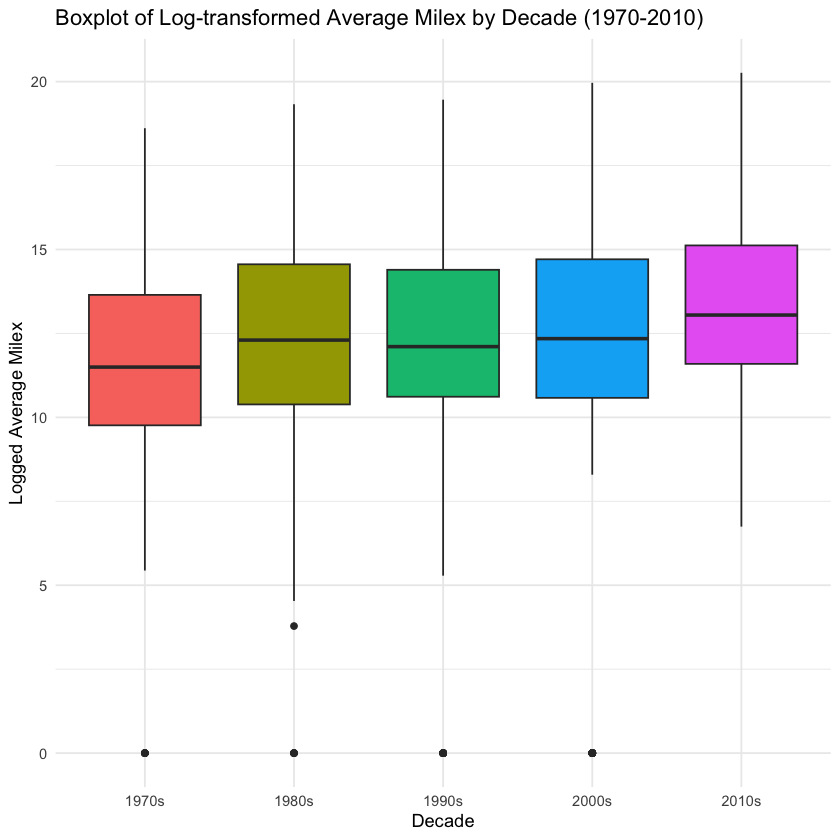

In [36]:
p_boxplot <- ggplot(decade_avg, aes(x = decade, y = log_milex, fill = decade)) +
  geom_boxplot() +
  labs(title = "Boxplot of Log-transformed Average Milex by Decade (1970-2010)",
       x = "Decade",
       y = "Logged Average Milex") +
  theme_minimal() +
  theme(legend.position = "none")

print(p_boxplot)


... and a violin plot as well!

Warning message:
“Removed 47 rows containing non-finite values (`stat_ydensity()`).”


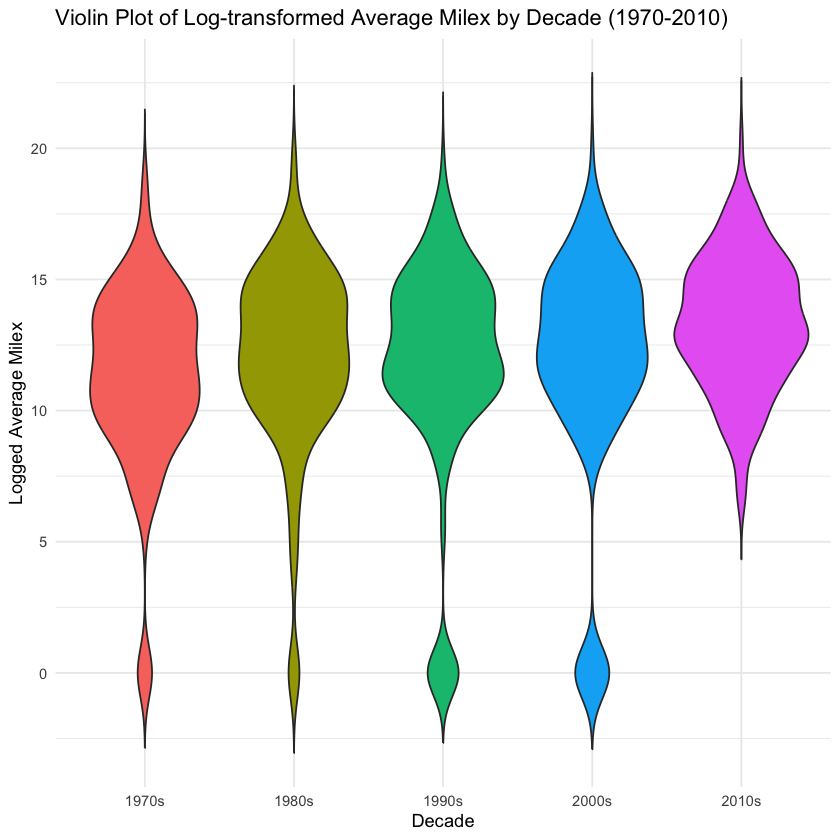

In [37]:
p_violin <- ggplot(decade_avg, aes(x = decade, y = log_milex, fill = decade)) +
  geom_violin(trim = FALSE) +  # trim=FALSE makes sure the full density is shown
  labs(title = "Violin Plot of Log-transformed Average Milex by Decade (1970-2010)",
       x = "Decade",
       y = "Logged Average Milex") +
  theme_minimal() +
  theme(legend.position = "none")

print(p_violin)
